In [2]:
%matplotlib inline
import pickle
import numpy as np
from spiral_acdt import Cluster
from sklearn.neighbors import NearestNeighbors
import sklearn.neighbors._unsupervised
from draw_utils import draw_3d_clusters, draw_spiral_clusters
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
with open('./saved/ckpt.pickle', 'rb') as f:
    x = pickle.load(f)
x.keys()

dict_keys([98, 96, 94, 92, 90, 88, 86, 84, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4])

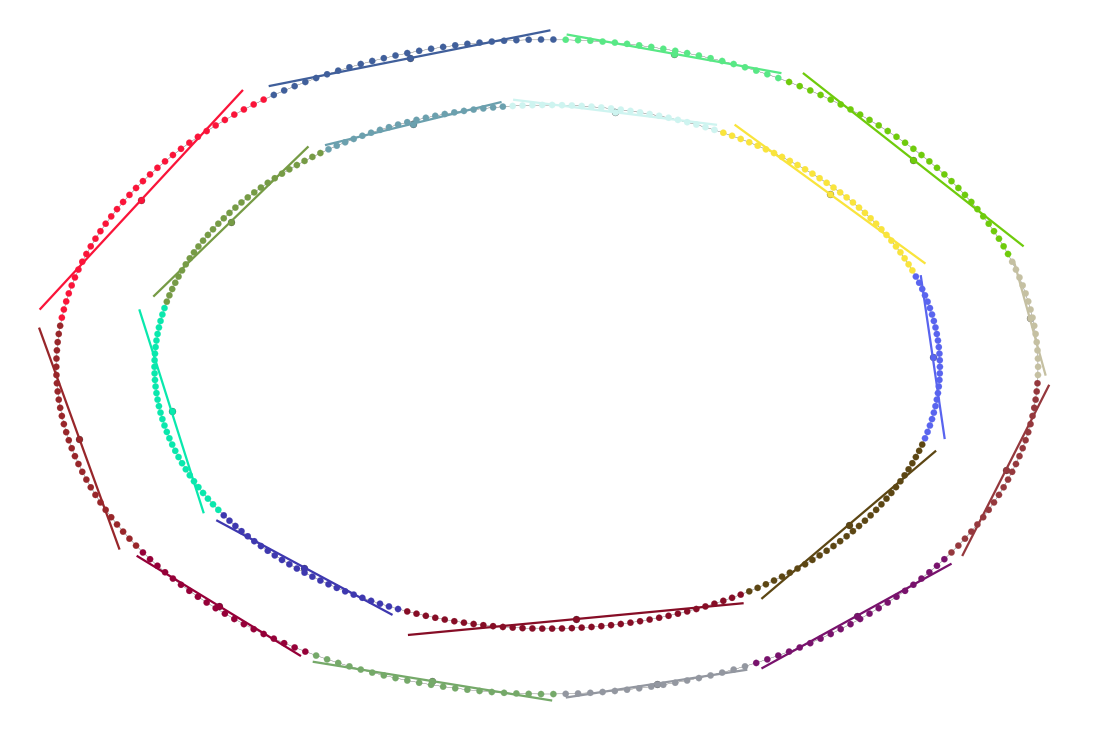

In [5]:
k = 20
C = x[k]['C']
if C[0].X[0].shape[0] == 2:
    draw_spiral_clusters(C, k=x[k]['knn'].n_neighbors)
elif C[0].X[0].shape[0] == 3:
    draw_3d_clusters(C)

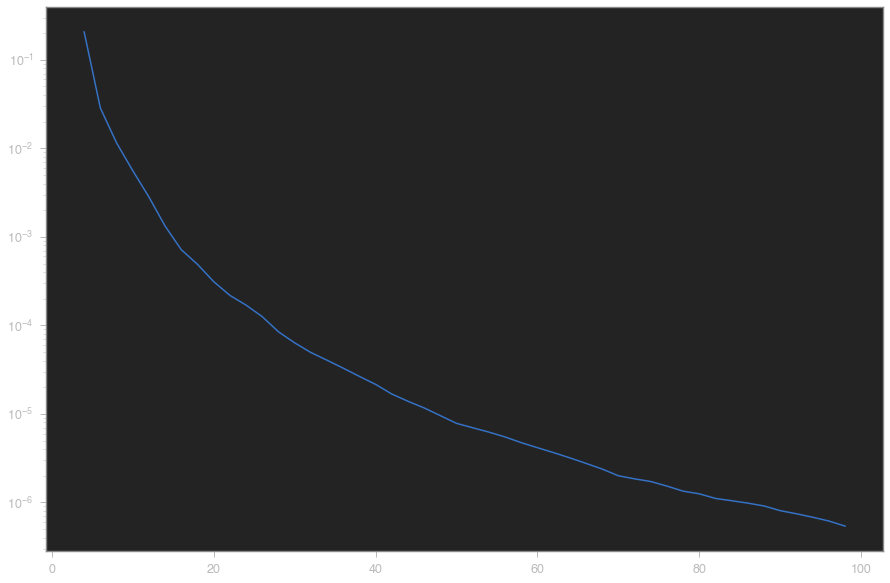

In [4]:
errors = {}
for it in x.keys():
    e = []
    C = x[it]['C']
    for Ci in C:
        F = Ci.F
        P = np.dot(F, F.T)
        samples = np.array(Ci.X).T
        mean_pos = np.mean(samples, axis=1, keepdims=True)
        s = samples - mean_pos

        proj = np.dot(P, s)
        e.append((s - proj)**2)
    errors[it] = np.mean(np.concatenate(e, axis=1), axis=(0, 1))

plt.semilogy(list(errors.keys()), list(errors.values()))
plt.show()